# EDA ON THE CLEANED DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:/CODE/DATA/jup/car_P/CLEANED/car_price_cleaned.csv")

# Dataset Overview 

In [3]:
print(df.head())

      company                           car_name  car_prices_in_rupee  \
0        Jeep  Compass 2.0 Longitude Option BSIV            1003000.0   
1     Renault               Duster RXZ Turbo CVT            1283000.0   
2      Toyota                        Camry 2.5 G            1640000.0   
3       Honda                        Jazz VX CVT             777000.0   
4  Volkswagen              Polo 1.2 MPI Highline             515000.0   

   kms_driven fuel_type transmission  ownership manufacture  engine  Seats  
0       86226    Diesel       Manual  1st Owner  2017-03-21    1956      5  
1       13248    Petrol    Automatic  1st Owner  2021-06-10    1330      5  
2       60343    Petrol    Automatic  1st Owner  2016-03-23    2494      5  
3       26696    Petrol    Automatic  1st Owner  2018-09-22    1199      5  
4       69414    Petrol       Manual  1st Owner  2016-02-17    1199      5  


In [4]:
print("Rows, Columns:", df.shape)
print("Columns:", df.columns.tolist())

Rows, Columns: (5462, 10)
Columns: ['company', 'car_name', 'car_prices_in_rupee', 'kms_driven', 'fuel_type', 'transmission', 'ownership', 'manufacture', 'engine', 'Seats']


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5462 entries, 0 to 5461
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              5462 non-null   object 
 1   car_name             5462 non-null   object 
 2   car_prices_in_rupee  5462 non-null   float64
 3   kms_driven           5462 non-null   int64  
 4   fuel_type            5462 non-null   object 
 5   transmission         5462 non-null   object 
 6   ownership            5462 non-null   object 
 7   manufacture          5462 non-null   object 
 8   engine               5462 non-null   int64  
 9   Seats                5462 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 426.8+ KB
None


# CAR PRICE DISTRIBUTION

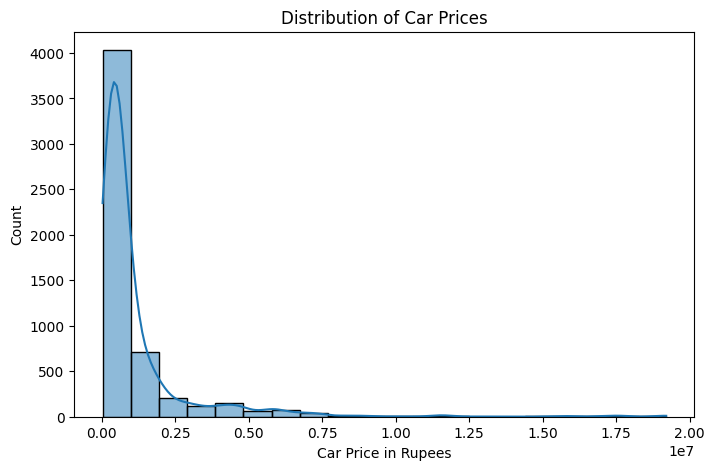

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['car_prices_in_rupee'],bins=20,kde=True)
plt.xlabel("Car Price in Rupees")
plt.ylabel("Count")
plt.title("Distribution of Car Prices")
plt.show()

# Engine Size Distribution

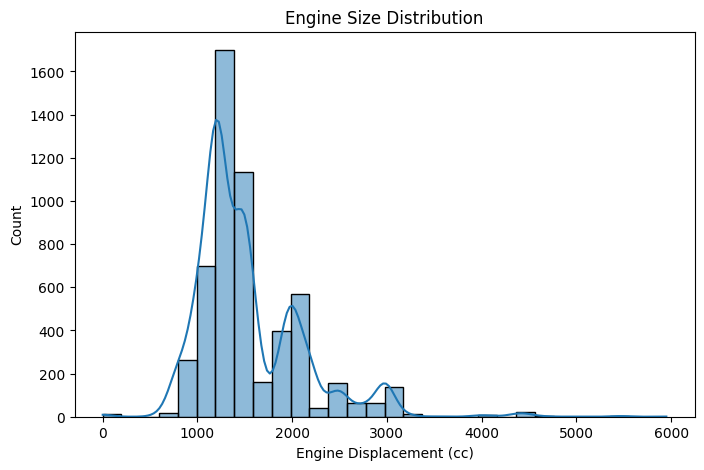

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['engine'], bins=30, kde=True)
plt.xlabel("Engine Displacement (cc)")
plt.title("Engine Size Distribution")
plt.show()


# Fuel Type Overview 

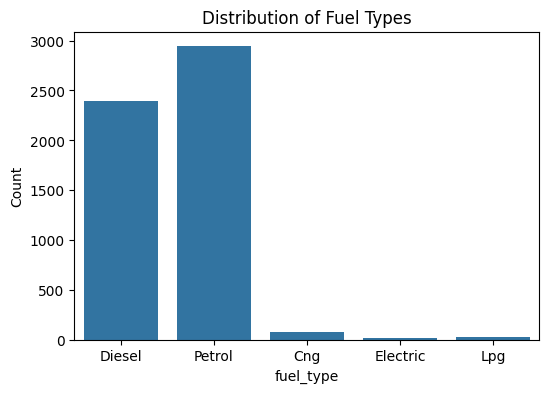

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='fuel_type', data=df)
plt.title('Distribution of Fuel Types')
plt.ylabel("Count")
plt.show()

In [20]:
print(df['fuel_type'].value_counts())
print("\n",df['transmission'].value_counts())
print("\n",df['ownership'].value_counts())
print("\n",df['company'].value_counts().head(10))

fuel_type
Petrol      2944
Diesel      2397
Cng           80
Lpg           27
Electric      14
Name: count, dtype: int64

 transmission
Manual       3924
Automatic    1538
Name: count, dtype: int64

 ownership
1st Owner    3698
2nd Owner    1303
3rd Owner     358
4th Owner      84
5th Owner      12
0th Owner       7
Name: count, dtype: int64

 company
Maruti           1373
Hyundai          1015
Honda             493
Mahindra          307
Mercedes-Benz     282
Tata              267
Toyota            263
BMW               171
Renault           167
Audi              166
Name: count, dtype: int64


# Brand Summary

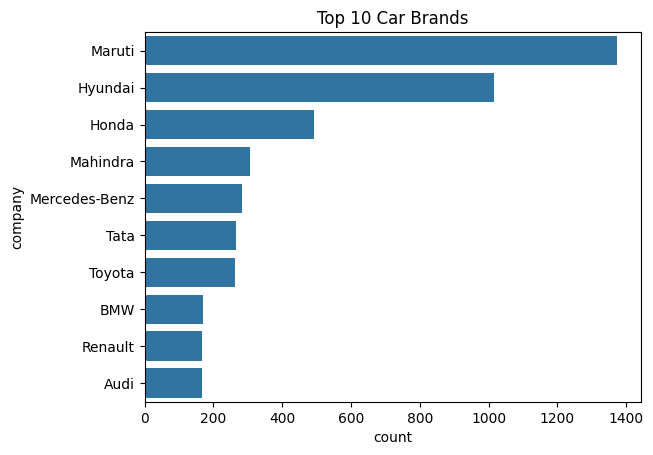

In [10]:
top_companies = df['company'].value_counts().index[:10]
sns.countplot(y='company', data=df, order=top_companies)
plt.title('Top 10 Car Brands')
plt.show()

# Average Car Price by Company

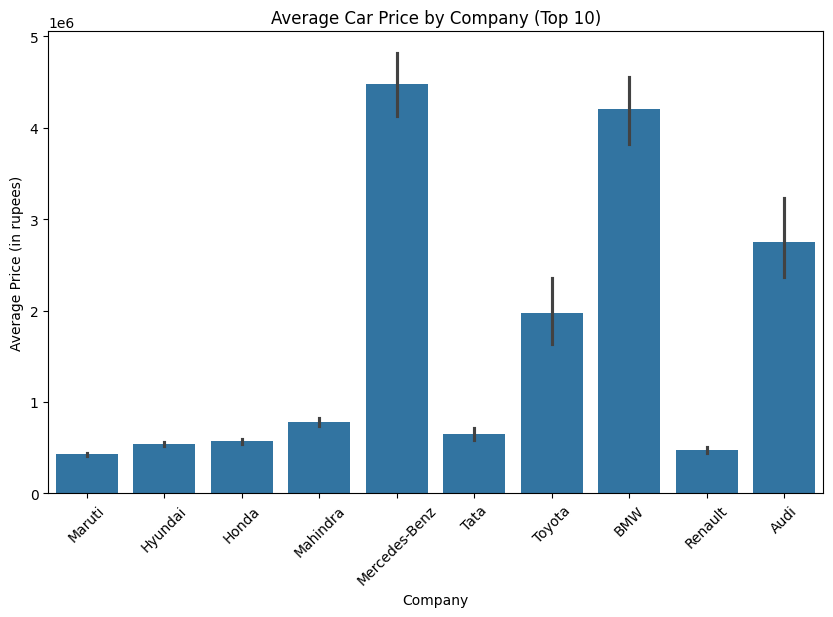

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='company', y='car_prices_in_rupee', data=df, order=df['company'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title('Average Car Price by Company (Top 10)')
plt.xlabel('Company')
plt.ylabel('Average Price (in rupees)')
plt.show()


# Yearly Trends

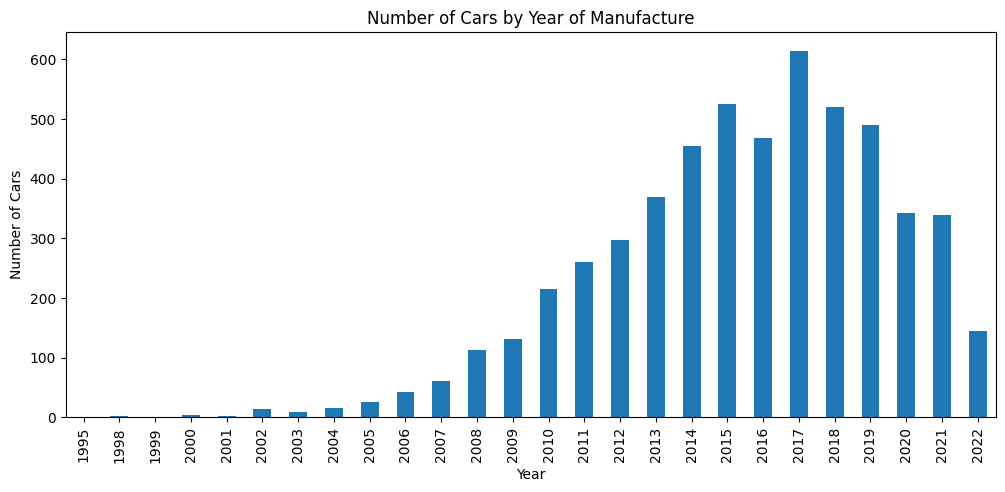

In [16]:
df['manufacture'] = pd.to_datetime(df['manufacture'], errors='coerce')
df['manufacture_year'] = df['manufacture'].dt.year

df['manufacture_year'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title('Number of Cars by Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()